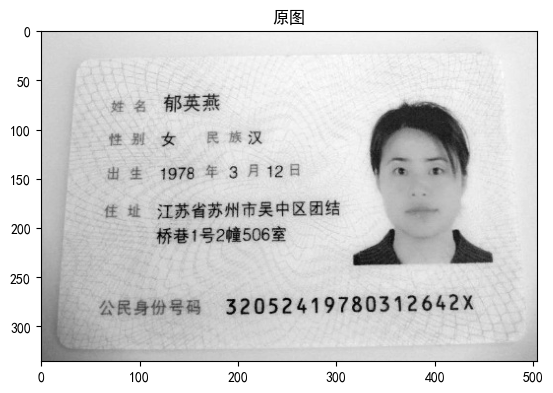

In [22]:
import cv2
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from utils import common
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
img=cv2.imread("../images/idcard.jpg")
grayImg=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
common.show(grayImg,"原图",cmap="gray",debug=True)
# plt.hist(grayImg.ravel(),256)
# plt.show()

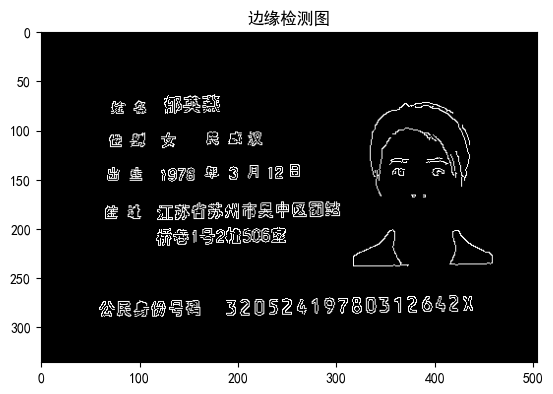

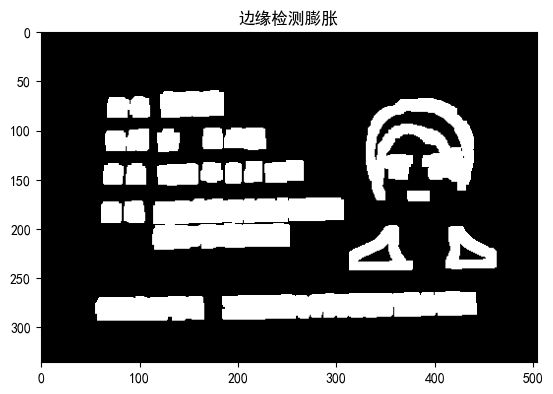

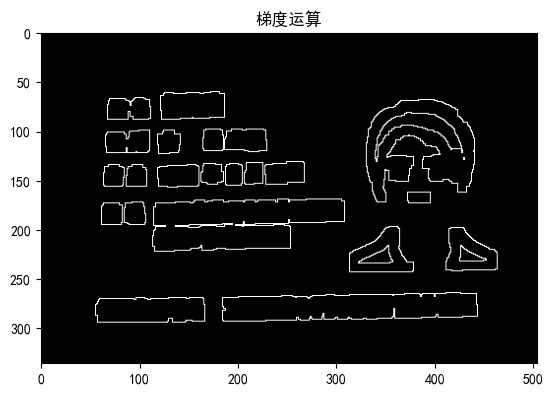

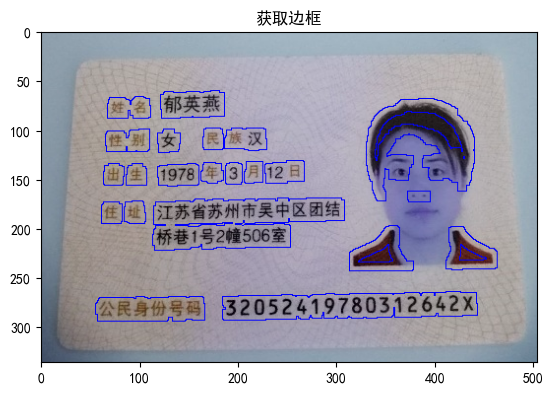

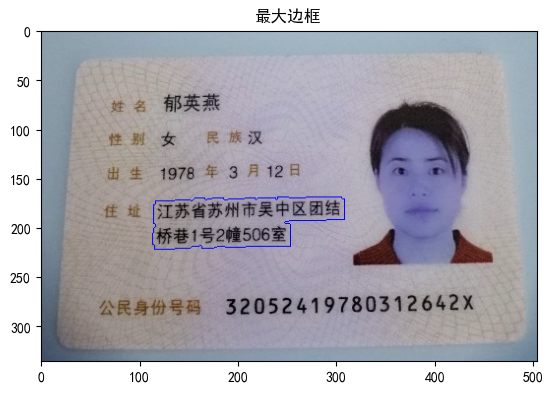

In [23]:
"""
Canny边缘检测算法是John F. Canny于1986年开发的一个多级边缘检测算法，该算法根据像素的梯度变化寻找图像边缘，最终可以绘制十分精细的二值边缘图像。
OpenCV将Canny边缘检测算法封装在Canny()方法中，该方法的语法如下：
     edges = cv2.Canny(image, threshold1, threshold2, apertureSize, L2gradient)
参数说明：

　image：检测的原始图像。
　threshold1：计算过程中使用的第一个阈值，可以是最小阈值，也可以是最大阈值，通常用来设置最小阈值。
　threshold2：计算过程中使用的第二个阈值，通常用来设置最大阈值。
　apertureSize：可选参数，Sobel算子的孔径大小。
　L2gradient：可选参数，计算图像梯度的标识，默认值为False。值为True时采用更精准的算法进行计算。
返回值说明：
　edges：计算后得出的边缘图像，是一个二值灰度图像。
在开发过程中可以通过调整最小阈值和最大阈值控制边缘检测的精细程度。当2个阈值都较小时，检测出较多的细节；当2个阈值都较大时，忽略较多的细节
"""
edges = cv2.Canny(grayImg, 100, 200)
common.show(edges,"边缘检测图",cmap="gray",debug=True)
zeroArray=np.ones((9,9))
pzt=cv2.dilate(edges, zeroArray)
common.show(pzt,"边缘检测膨胀",cmap="gray",debug=True)
# dest=cv2.blur(pzt,(9,9))
zeroArray=np.ones((2,2))
dst = cv2.morphologyEx(pzt, cv2.MORPH_GRADIENT, zeroArray)
common.show(dst,"梯度运算",cmap="gray",debug=True)
contours, hierarchy = cv2.findContours(dst, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
common.show(cv2.drawContours(img.copy(), contours, -1, (0, 0, 255), 1),"获取边框",cmap="gray",debug=True)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[0]
common.show(cv2.drawContours(img.copy(), [contours], -1, (0, 0, 255), 1),"最大边框",cmap="gray",debug=True)